# TD4: Quelques faits statistiques des séries financières
Cours de **Physique Statistique - OMI 446**
*Michael Benzaquen,*
*Antoine Fosset, José Moran, Mehdi Tomas* 

On présente ici quelques fonctions pour vous aider à répondre aux questions.

## Aide: quelques conseils

On rapelle ici:

- la création de liste avec la syntaxe `[f(x) for x in liste_elements]`
- comment générer des échantillons de loi normale avec `np.random.normal`
- comment changer les échelles d'un graphe en échelle logarithmique avec `plt.xscale` et `plt.yscale`

In [4]:
def f(x):
    return x*x
    
[f(x) for x in [0,1,2]]

[0, 1, 4]

In [25]:
moyenne = 1.0
sigma = 2.0
N_echantillons = 10

np.random.normal(size=N_echantillons, loc=moyenne, scale=sigma)

array([-3.16740146, -0.04454043,  1.33360883, -0.14721454,  0.27536706,
        3.81410673,  2.48188364, -1.07057713,  0.40228368,  5.51804315])

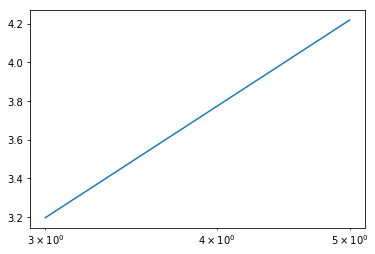

In [32]:
x = np.linspace(3,5)
y = 2*np.log(x) + 1

plt.plot(x,y)
plt.xscale('log')
plt.show()

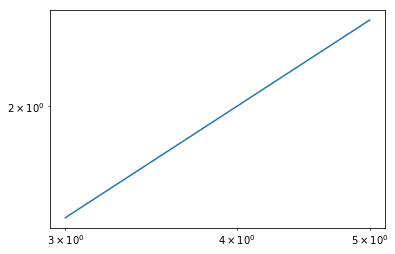

In [35]:
x = np.linspace(3,5)
y = x**(0.5)

plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')
plt.show()

## Aide: Préparation des données

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("^GSPC.csv")
data.index = pd.to_datetime(data["Date"])

### Calcul des returns

Pour calculer les *returns*, on pourra utiliser la méthode `shift`$(-\Delta)$ qui transforme la série $x_1, \cdots x_t$ en $x_{\Delta}, \cdots x_{t-\Delta}$ et impute les valeurs manquantes pour que les deux séries soient de même taille.

On donne un exemple:

In [14]:
x_t = np.arange(0, 5)
x = pd.Series(x_t)
print(x)
print("Shift 0: \n", x.shift(0))
print("Shift -2: \n", x.shift(-2))
print("Shift +2: \n", x.shift(2))

0    0
1    1
2    2
3    3
4    4
dtype: int64
Shift 0: 
 0    0
1    1
2    2
3    3
4    4
dtype: int64
Shift -2: 
 0    2.0
1    3.0
2    4.0
3    NaN
4    NaN
dtype: float64
Shift +2: 
 0    NaN
1    NaN
2    0.0
3    1.0
4    2.0
dtype: float64


### Gestion des valeurs manquantes

La méthode `dropna` retire les valeurs manquantes d'une série donnée.

On donne un exemple:

In [17]:
x_t = np.array([0, np.nan, 1, np.nan])
x = pd.Series(x_t)
print(x)
print(x.dropna())

0    0.0
1    NaN
2    1.0
3    NaN
dtype: float64
0    0.0
2    1.0
dtype: float64


## Aide: Partie 2, fonctions de survie

On utilisera les fonctions définies ci-après pour calculer les fonctions de survie d'une loi de student centrée et d'une loi normale centrée. 

On donne un exemple ensuite:

In [19]:
def survie_student(x, sigma, nu):
    from scipy.stats import t
    return t.sf(x=x, scale=sigma, df=nu)

def survie_normal(x,sigma):
    from scipy.stats import norm
    return norm.sf(x=x, scale=sigma)

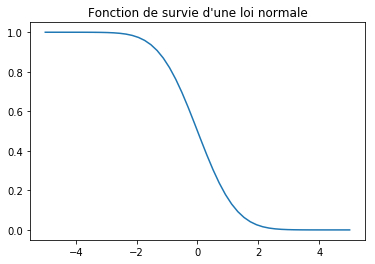

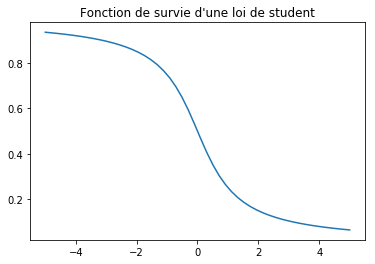

In [32]:
X = np.linspace(-5,5,num=50)


sigma = 1.0
plt.clf()
plt.title("Fonction de survie d'une loi normale")
plt.plot(X,[survie_normal(x,sigma) for x in X])
plt.show()


sigma = 1.0
nu = 1.0
plt.clf()
plt.title("Fonction de survie d'une loi de student")
plt.plot(X,[survie_student(x,sigma, nu) for x in X])
plt.show()

## Aide: Partie 2, histogrammes

On donne un exemple de l'utilisation de la fonction `plt.hist`. On se contentera de l'appel le plus simple à la fonction où l'on spécifie les données et le nombre de *bins* à utiliser, c'est-à-dire le nombre d'intervalles différents que l'on considère.


Lors de l'appel a la fonction, on doit de plus préciser:
- `normed=True`
- `cumulative=-1` pour la fonction de survie
- `cumulative=1` pour la fonction de répartition


In [49]:
x = np.linspace(-1,1,num=200)
plt.hist(x, bins=50, normed=True, cumulative=1)

/Users/TM/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
        0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
        0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
        0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
        0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
         0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 <a list of 50 Patch objects>)

In [51]:
x = np.linspace(-1,1,num=200)
plt.hist(x, bins=50, normed=False, cumulative=-1)

/Users/TM/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([200., 196., 192., 188., 184., 180., 176., 172., 168., 164., 160.,
        156., 152., 148., 144., 140., 136., 132., 128., 124., 120., 116.,
        112., 108., 104., 100.,  96.,  92.,  88.,  84.,  80.,  76.,  72.,
         68.,  64.,  60.,  56.,  52.,  48.,  44.,  40.,  36.,  32.,  28.,
         24.,  20.,  16.,  12.,   8.,   4.]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
         0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 <a list of 50 Patch objects>)